In [1]:
#import libraies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data


df=pd.read_csv('loan.csv')
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## INSPECTION THE DATA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
v=round(df.isnull().sum()/len(df.index)*100,2)
v

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

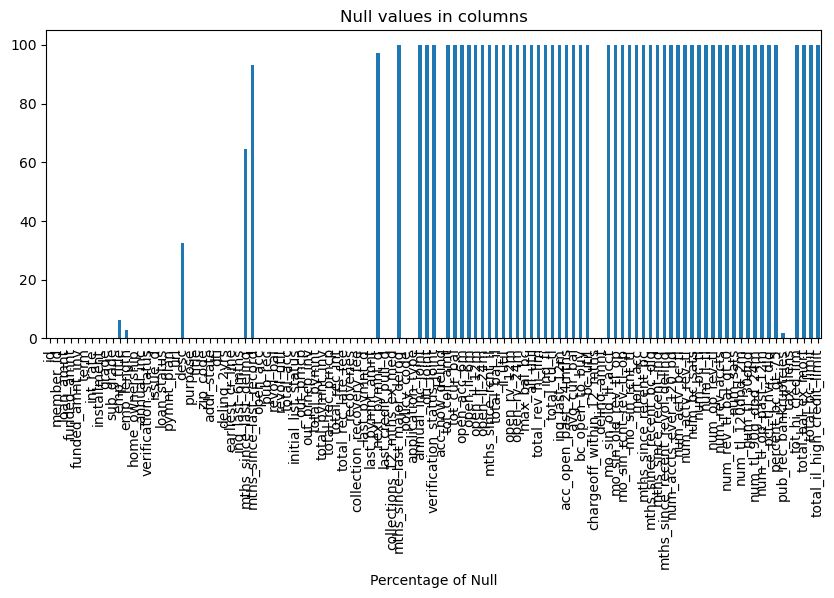

In [7]:
plt.figure(figsize = (10,4), dpi=100)
v.plot(kind = "bar")
plt.title("Null values in columns")
plt.xlabel('Percentage of Null')
plt.show()

##### drop all values whose null value is more than 90% 

In [8]:
misvalue=df.columns[(df.isnull().sum()/len(df.index)*100)>90]
misvalue

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [9]:
df=df.drop(misvalue,axis=1)
df.shape

(39717, 55)

In [10]:
round(df.isnull().sum()/len(df.index)*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [11]:
#check values of null value 32---64 % columns

df.loc[:,['desc','mths_since_last_delinq']]

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
...,...,...
39712,Our current gutter system on our home is old a...,0.0
39713,The rate of interest and fees incurred by carr...,5.0
39714,NaN,0.0
39715,NaN,0.0


In [12]:
#drop these columns they dont have any valuable values 

df=df.drop(columns=['desc','mths_since_last_delinq'],axis=1)

In [13]:
df.shape

(39717, 53)

In [14]:
round(df.isnull().sum()/len(df.index)*100,2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [15]:
#check null in rows
df.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [16]:
# drop all values whose is unneccery\\

unwanted =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
unwanted

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [17]:
df=df.drop(unwanted,axis=1)
df.shape

(39717, 32)

In [18]:
#NOW CHECK ALL VALUES ARE IN RIGHT FORMAT OR NOT
df1=df
df1.shape

(39717, 32)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [20]:
# AS WE SEE INT_RATE IS IN OBJECT FORM CHANGE IT IN IN INT
df1['int_rate']=df1['int_rate'].apply(lambda x: x.split('%')[0]).astype(float)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [22]:
# emp length is in object but length always in int so change it
df1.emp_length

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [23]:
df1=df1[~df1["emp_length"].isnull()]

import re
df1['emp_length'] = df1['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
df1['emp_length'] = df1['emp_length'].apply(lambda x: pd.to_numeric(x))
df1.emp_length

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38642, dtype: int64

In [24]:
# drop unwanted column

df1 = df1.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)
df1.shape

(38642, 28)

In [25]:
round(df1.isnull().sum()/len(df1.index)*100,2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     3.73
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
purpose                       0.00
dti                           0.00
initial_list_status           0.00
collections_12_mths_ex_med    0.14
policy_code                   0.00
acc_now_delinq                0.00
chargeoff_within_12_mths      0.14
delinq_amnt                   0.00
pub_rec_bankruptcies          1.80
tax_liens                     0.10
dtype: float64

In [26]:
#check loan status
df1.loan_status.value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [27]:
# THE CURRENT STATUS IS SET AS NON DEFAULTED AS GIVEN IN STATEMET DROP IT
df1=df1[df1['loan_status']!='Current']

#now change fully paid to 0 and charged of to one 

df1.loan_status=df1.loan_status.apply(lambda x: 0 if x=='Fully Paid' else 1)
df1.loan_status.value_counts()

loan_status
0    32145
1     5399
Name: count, dtype: int64

# ANALYSE THE DATA

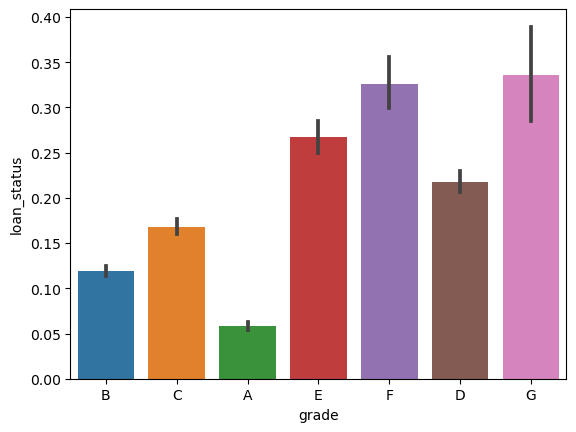

In [28]:
#HIGHER THE GRADE HIGHER THE RISK
sns.barplot(x='grade',y='loan_status',data=df1)
plt.show()

In [29]:
#lets define it 
def chart_plot(x):
    sns.barplot(x=x,y="loan_status",data=df1)
    plt.show()

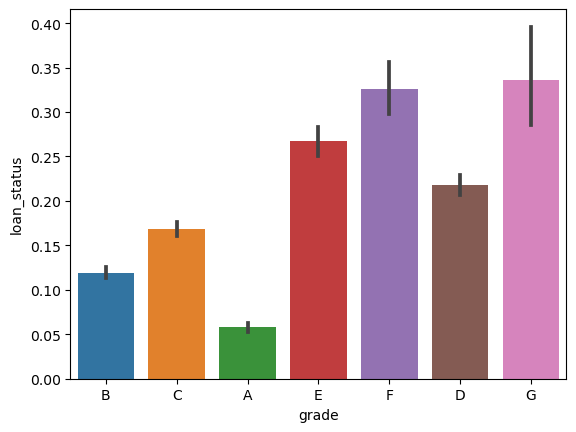

In [30]:
chart_plot('grade')

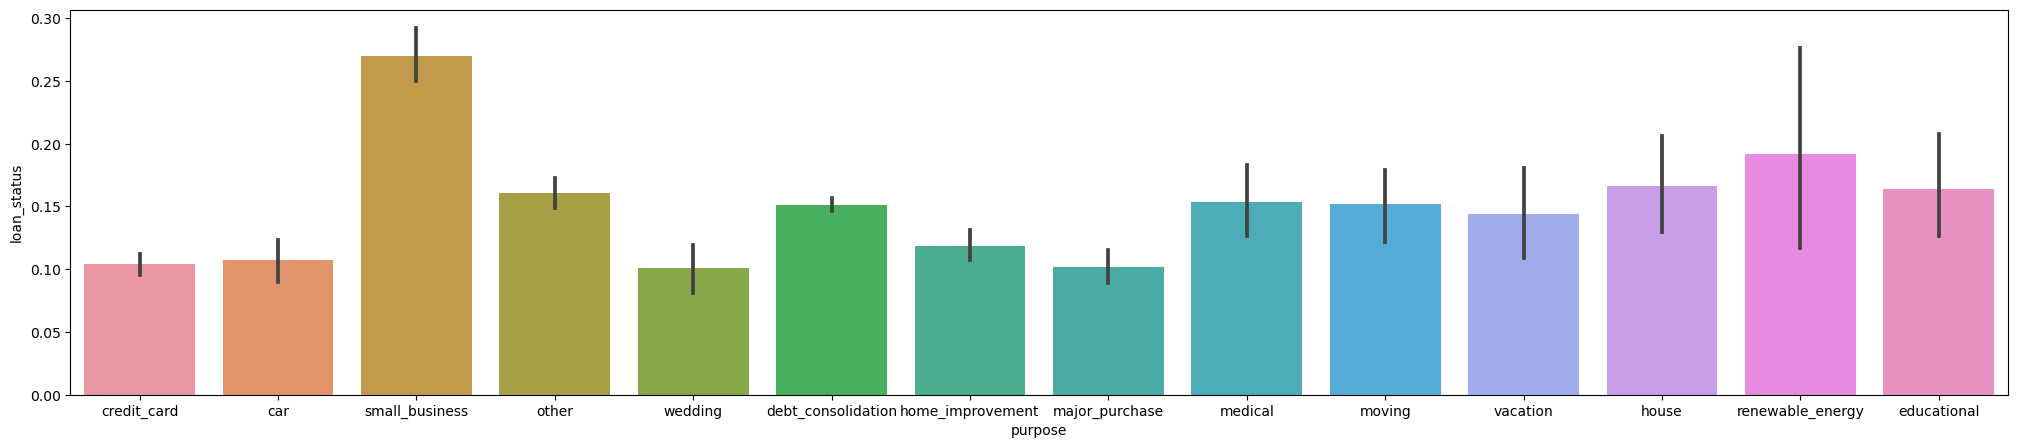

In [31]:
plt.figure(figsize=(25, 5))
chart_plot('purpose')

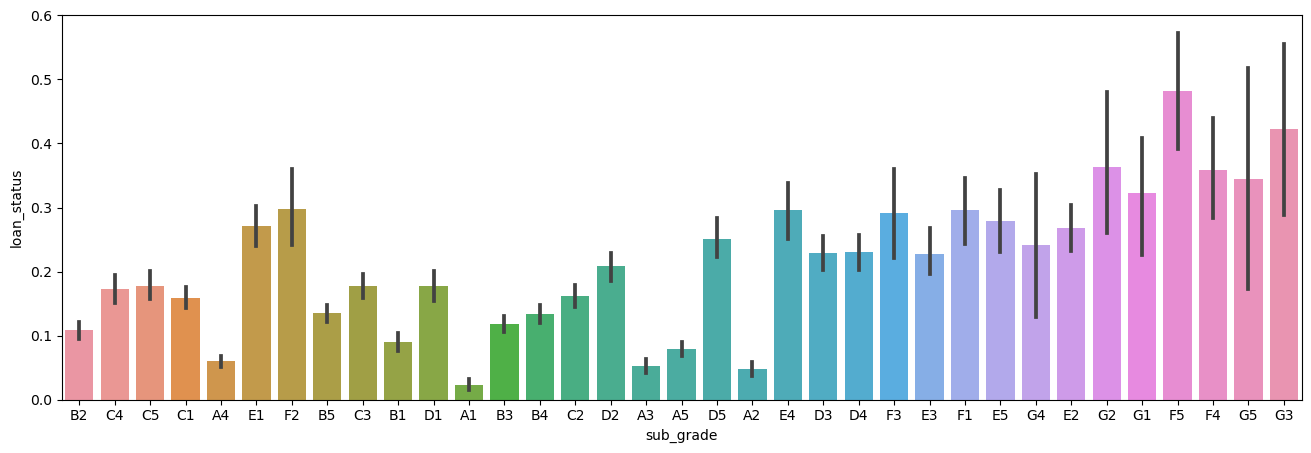

In [32]:
plt.figure(figsize=(16,5))
chart_plot('sub_grade')

In [33]:
df1.home_ownership.value_counts()

home_ownership
RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: count, dtype: int64

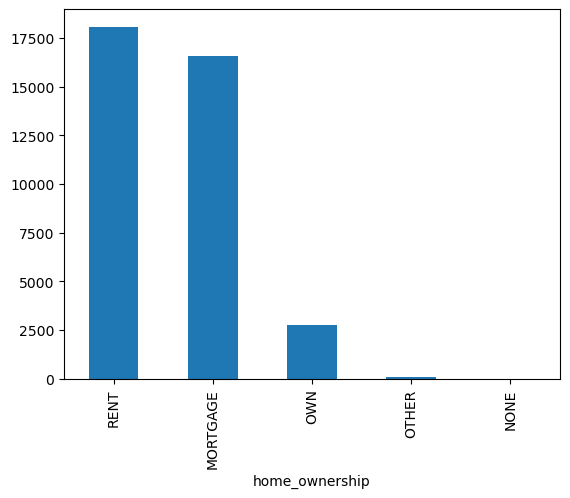

In [34]:
df1.home_ownership.value_counts().plot(kind='bar')
plt.show()

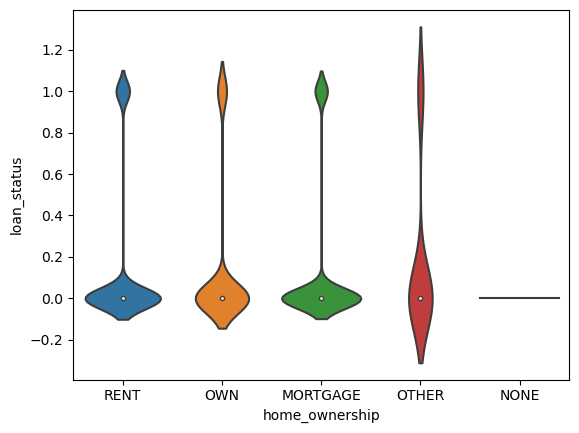

In [35]:
sns.violinplot(x='home_ownership',y='loan_status',data=df1)
plt.show()

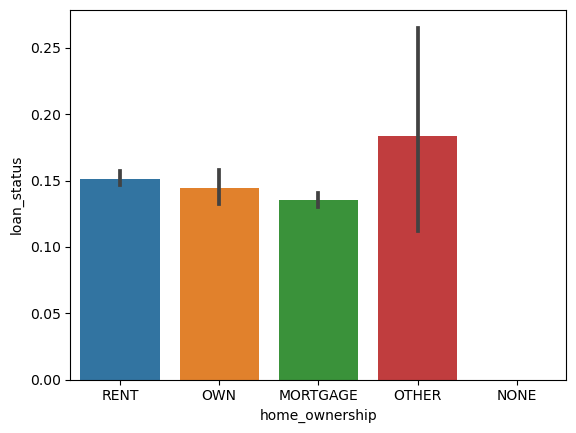

In [36]:
#AFTER ANALYSE I FIND THAT RENT HAS HIGHER THE RISK OVER THE ALL KNOWN CATEGORY( OTHERS HAVE HIGH RISK BUT IT NOT DEFINE WHY IT TAKES)
chart_plot('home_ownership')

In [37]:
#check when the loan issue
df1['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [38]:
#CONVERT THE DATETIME FORMAT IN RIGHT FORMAT SEPRATE BOTH MONTH AND YEAR
from datetime import datetime
df1['issue_d'] = df1['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
df1['month'] = df1['issue_d'].apply(lambda x: x.month)
df1['year'] = df1['issue_d'].apply(lambda x: x.year)

In [39]:
df1.month.value_counts()

month
12    4120
11    3890
10    3637
9     3394
8     3321
7     3253
6     3094
5     2838
4     2756
3     2632
1     2331
2     2278
Name: count, dtype: int64

In [40]:
df1.year.value_counts()

year
2011    19801
2010    11214
2009     4716
2008     1562
2007      251
Name: count, dtype: int64

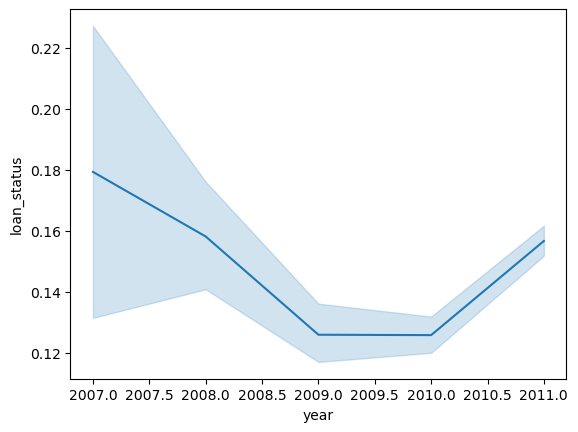

In [41]:
sns.lineplot(x='year',y='loan_status',data=df1)
plt.show()

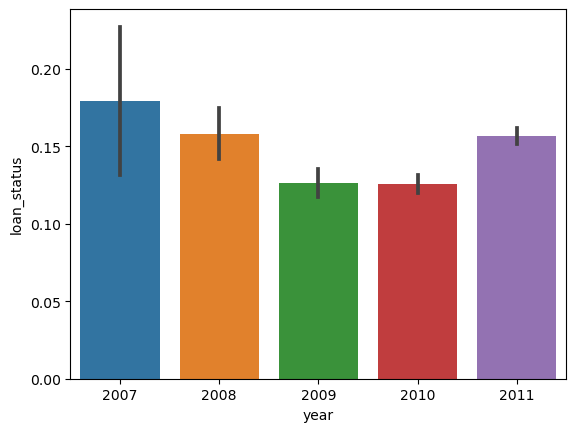

In [42]:
#AFTER ANALYSE 2007 HAS HIGHER RISK
chart_plot('year')

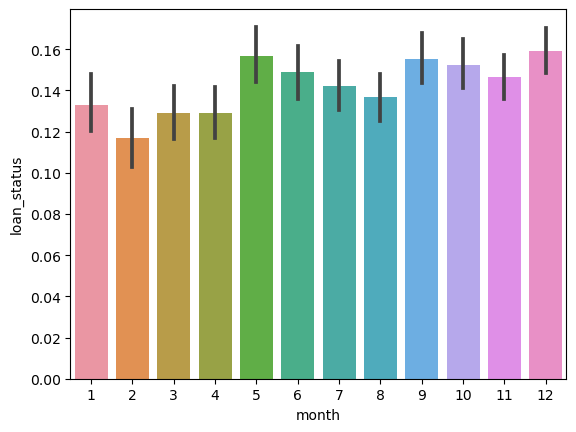

In [43]:
#INCREASE IN MONTH INCREASE THE RISK
chart_plot('month')

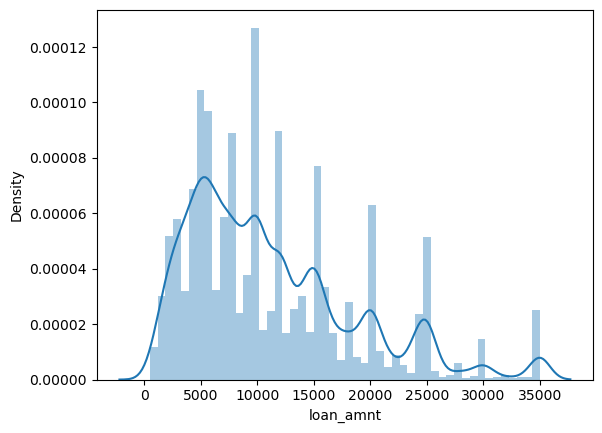

In [44]:
sns.distplot(df['loan_amnt'])
plt.show()

In [45]:
# break into categories loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'

df1.loan_amnt=df1.loan_amnt.apply(lambda x: loan_amount(x))

In [46]:
df1.loan_amnt.value_counts()

loan_amnt
medium       20157
high          7572
low           7095
very high     2720
Name: count, dtype: int64

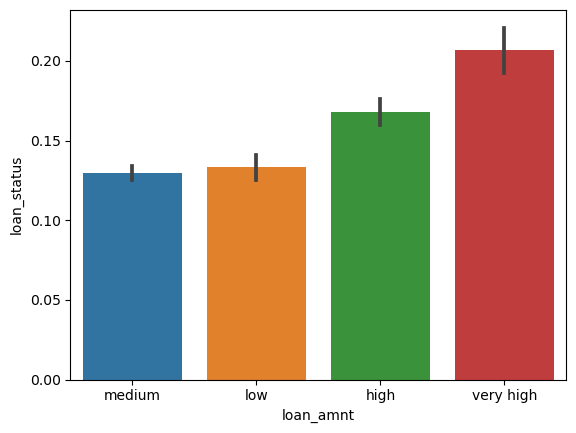

In [47]:
#plot a chart 
# higher the loan amount the higher the default rate 
chart_plot('loan_amnt')

In [48]:
df1['funded_amnt_inv'] = df1['funded_amnt_inv'].apply(lambda x: loan_amount(x))

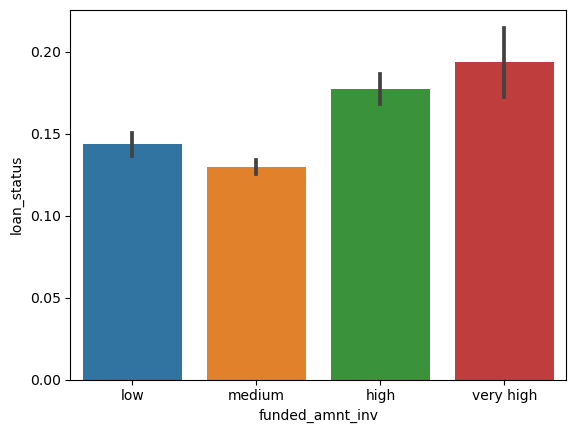

In [49]:
#HIGHER THE FUNDED AMOUNT INVESTMENT HIGHER THE DEFAULT RISK

chart_plot('funded_amnt_inv')

In [50]:
# lets also convert interest rate to low, medium, high

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df1['int_rate'] = df1['int_rate'].apply(lambda x: int_rate(x))

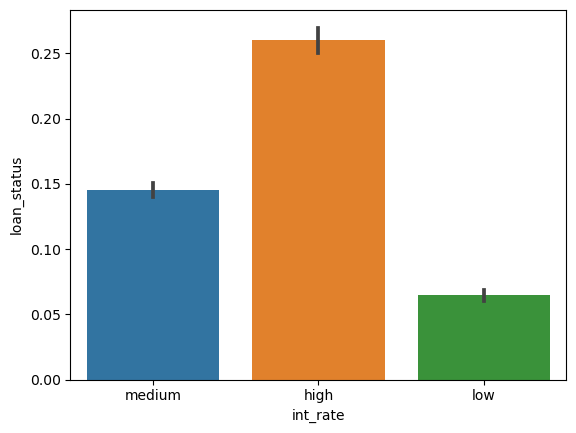

In [51]:
#HIGHER THE INTEREST RATE HIGHER THE DEFAULT RISK
chart_plot('int_rate')

In [52]:
# in come ratio
def ratio(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df1['dti'] = df1['dti'].apply(lambda x: ratio(x))

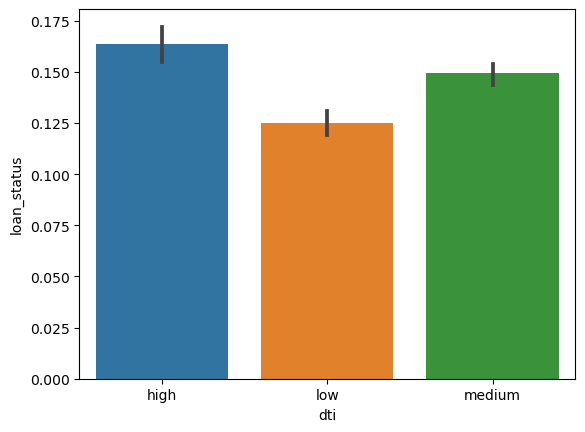

In [53]:
chart_plot('dti')

In [54]:
# Segregating the funded amount into the respective bins into Low, Medium and High 
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df1['funded_amnt'] = df1['funded_amnt'].apply(lambda x: funded_amount(x))

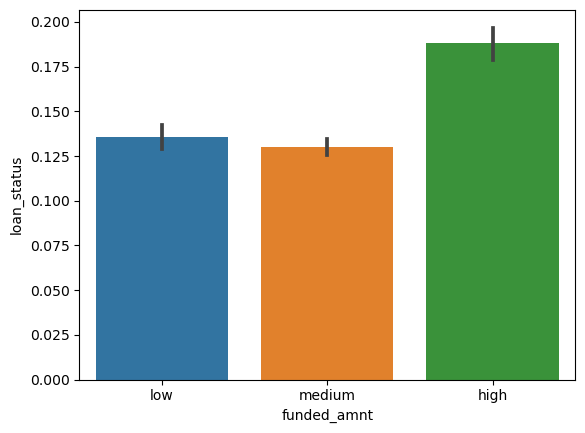

In [55]:
#HIGHER THE FUNDED AMOUNT HIGHER THE DEFAULT RISK
chart_plot('funded_amnt')

In [56]:
# employment length
# first, let's drop the missing value observations in emp length
df1 = df1[~df1['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df1['emp_length'] = df1['emp_length'].apply(lambda x: emp_length(x))

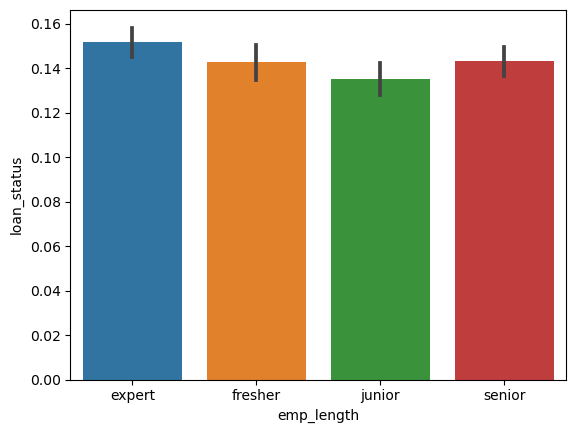

In [57]:
#EXPERT HAS HIGHER THE DEFAULT RISK
chart_plot('emp_length')

In [58]:
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df1['annual_inc'] = df1['annual_inc'].apply(lambda x: annual_income(x))

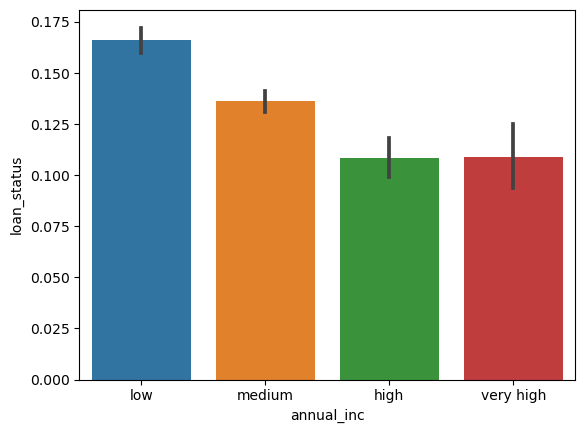

In [59]:
#lower the aanual income higher the default rate 
chart_plot('annual_inc')

In [60]:
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df1['installment'] = df1['installment'].apply(lambda x: installment(x))

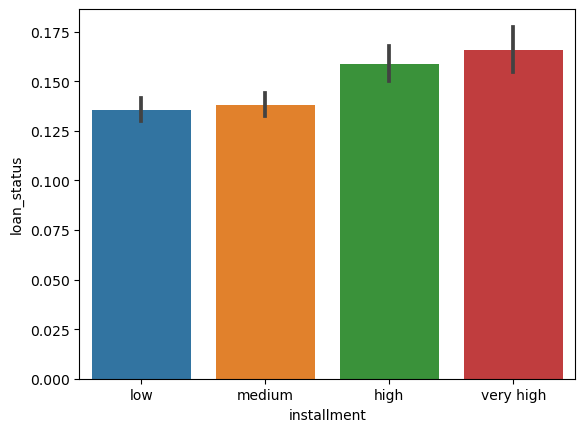

In [61]:
#higher the installment higher the default rate
chart_plot('installment')

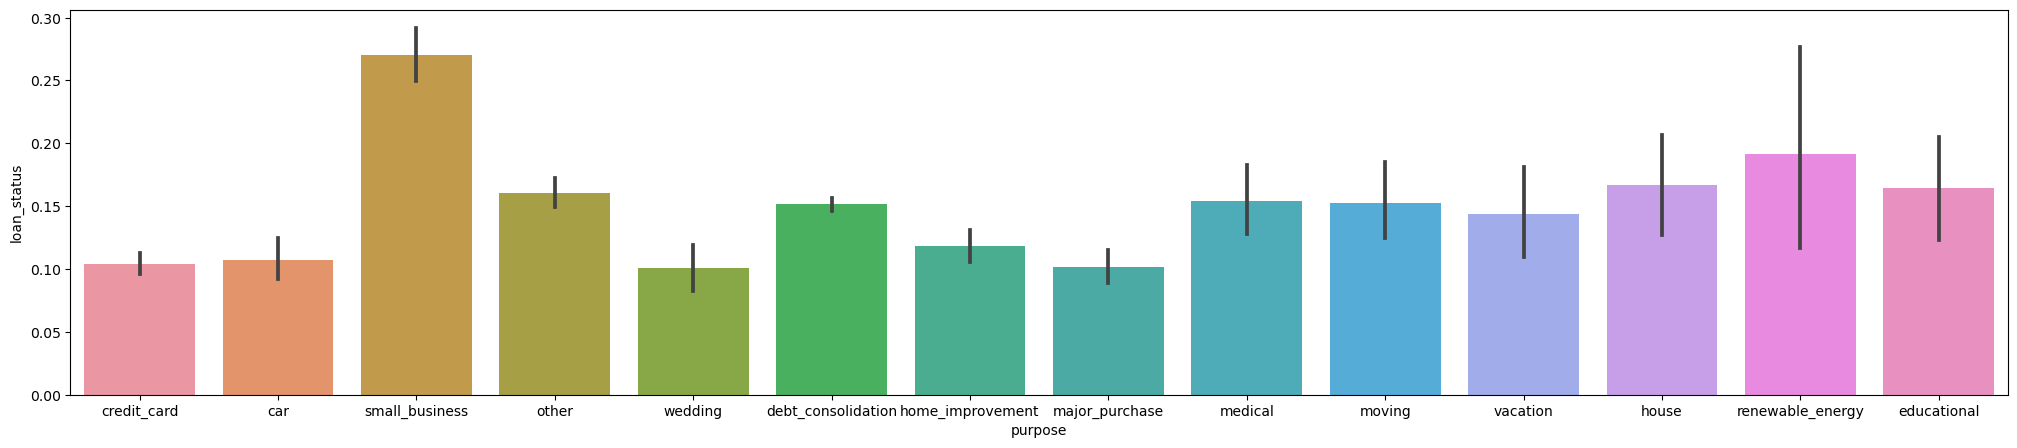

In [62]:
plt.figure(figsize=(25, 5))
chart_plot('purpose')

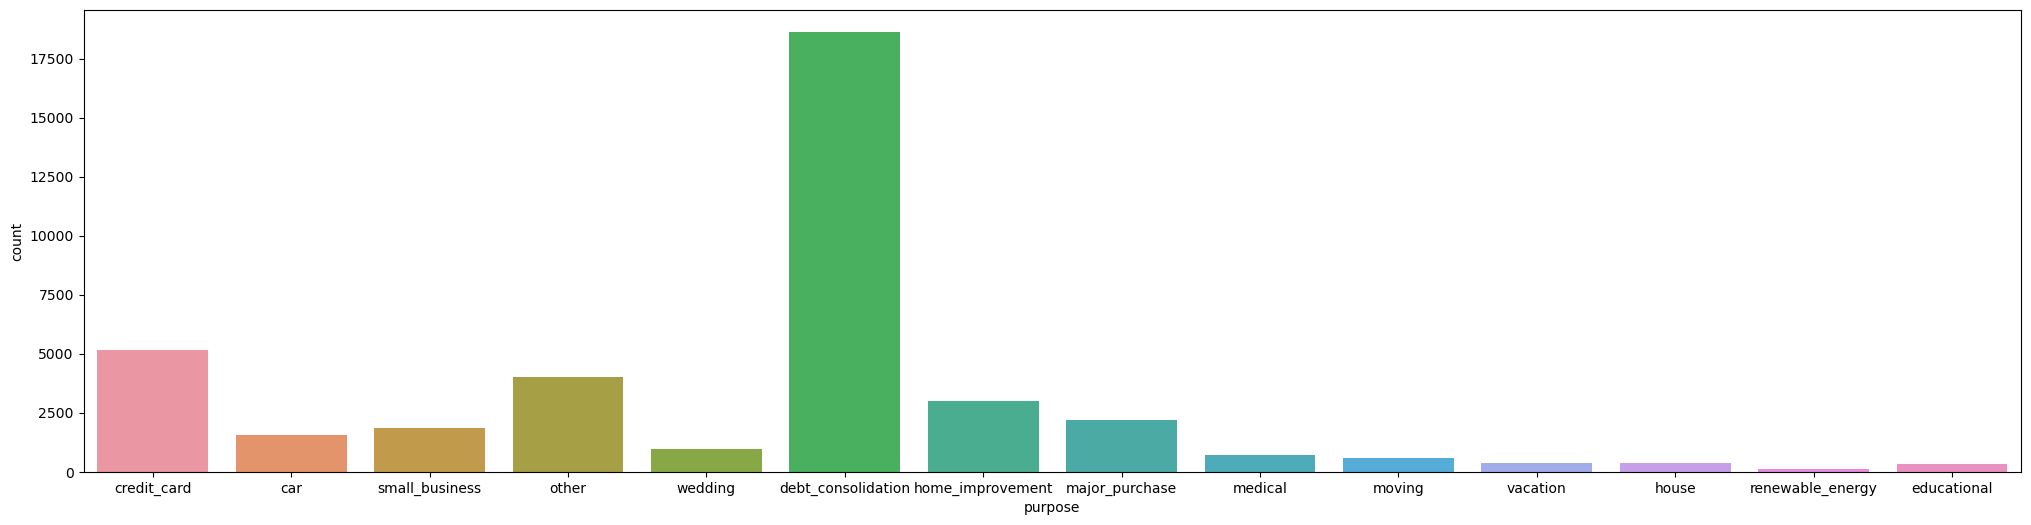

In [63]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(25, 6))
sns.countplot(x='purpose', data=df)
plt.show()

In [64]:
#analyse top 5 from purpose
top5 = ["credit_card","debt_consolidation","home_improvement","major_purchase","small_business"]
df1 = df1[df1['purpose'].isin(top5)]
df1['purpose'].value_counts()

purpose
debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
small_business         1710
Name: count, dtype: int64

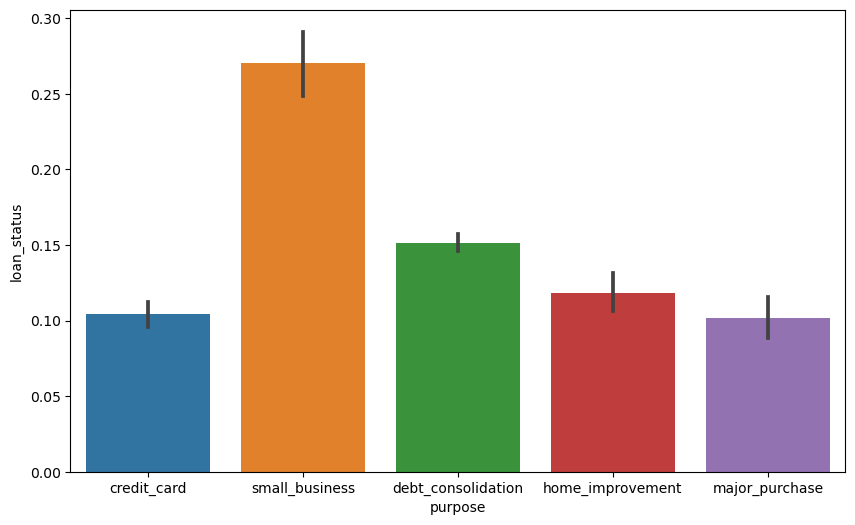

In [65]:
plt.figure(figsize=(10,6))
chart_plot('purpose')

#

#

#

### AFTER ANALYSE ABOVE DATA WE GOT A MANY GRAPHS HERE IS THE COMMON GRAPH FROM AVOVE IN ONE SLIDE I FIND THAT MOSTLY GRAPHS SHOWS THET HIGH THE VALUE HIGH THE RISK RATE

#

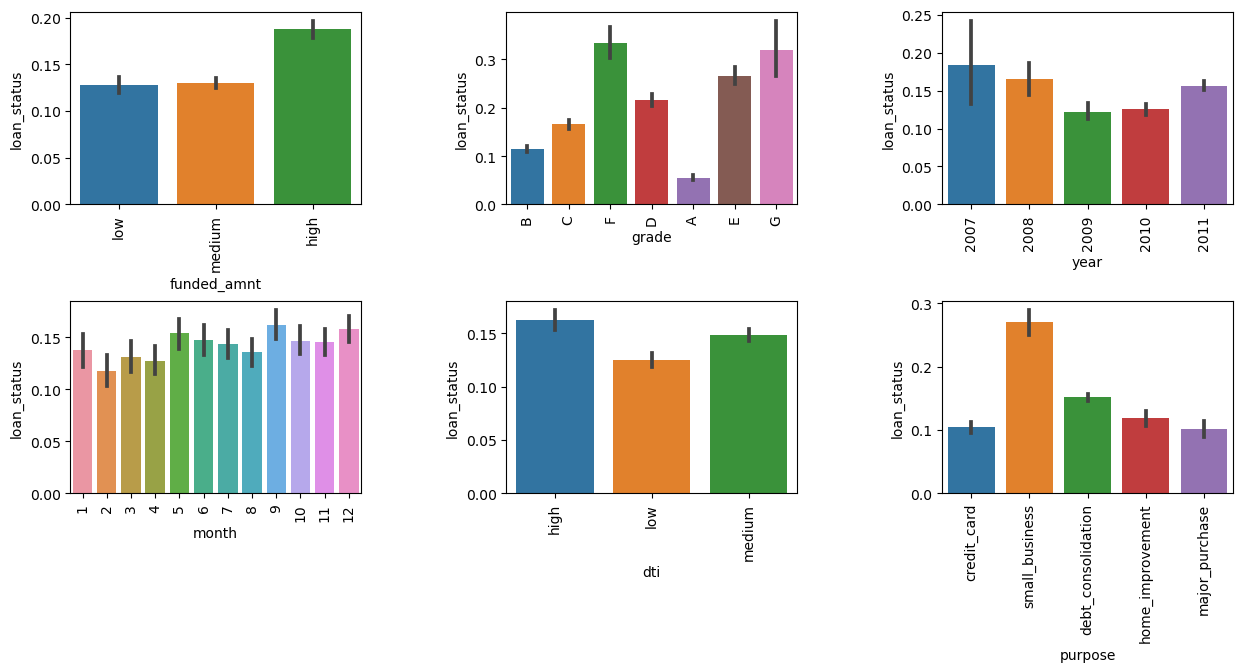

In [84]:
x=['funded_amnt','grade','year','month','dti','purpose']
plt.figure(figsize=(15,10))

for i in enumerate(x):
    plt.subplot(3, 3, i[0]+1)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.barplot(x = i[1], y = 'loan_status', data = df1)
    plt.xticks(rotation=90)

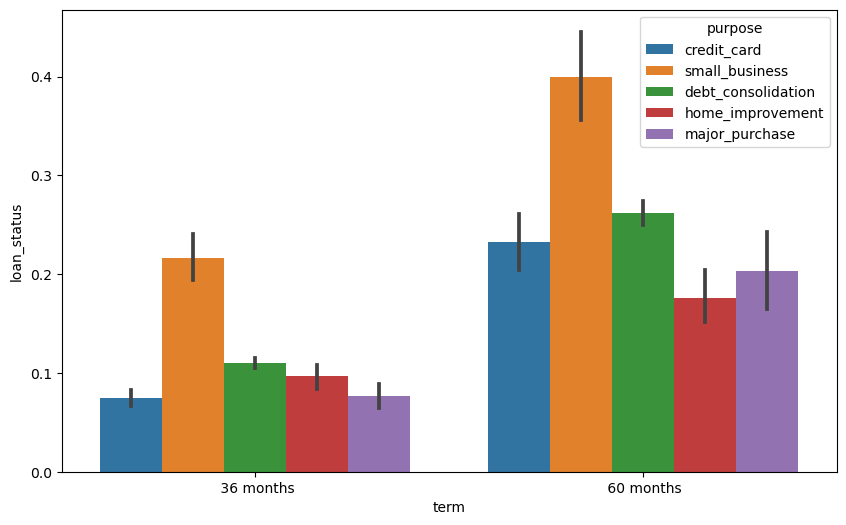

In [67]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df1)
plt.show()

In [68]:
def plot_seg(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df1)
    plt.show()



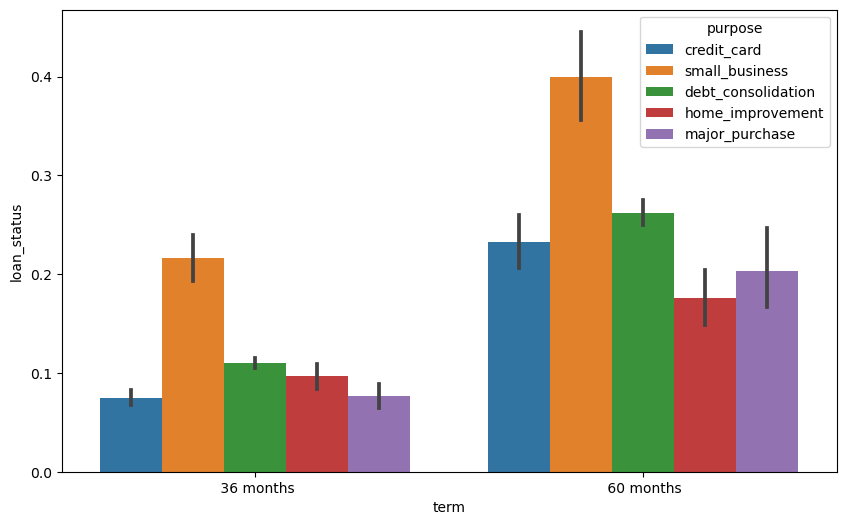

In [69]:
plot_seg('term')

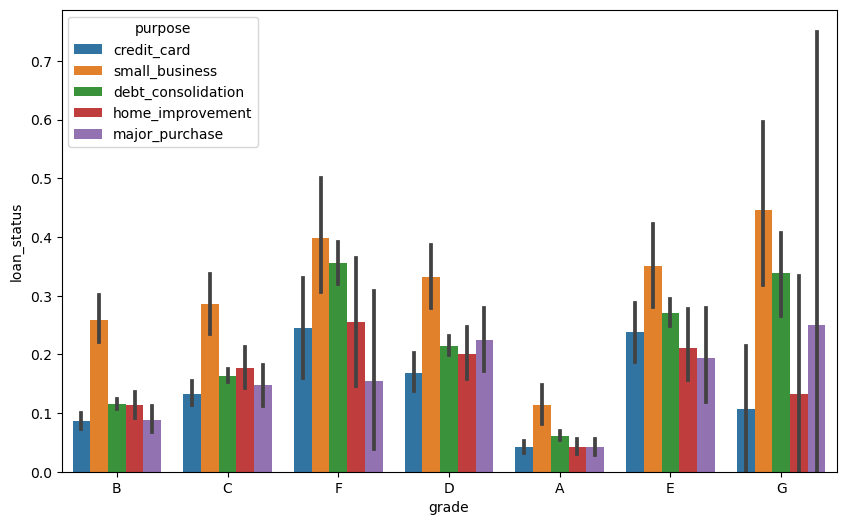

In [70]:
plot_seg('grade')

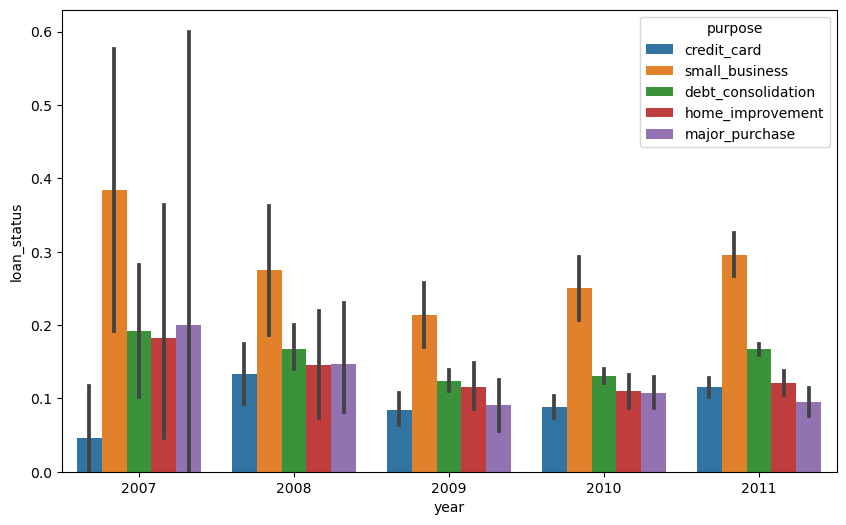

In [71]:
plot_seg('year')

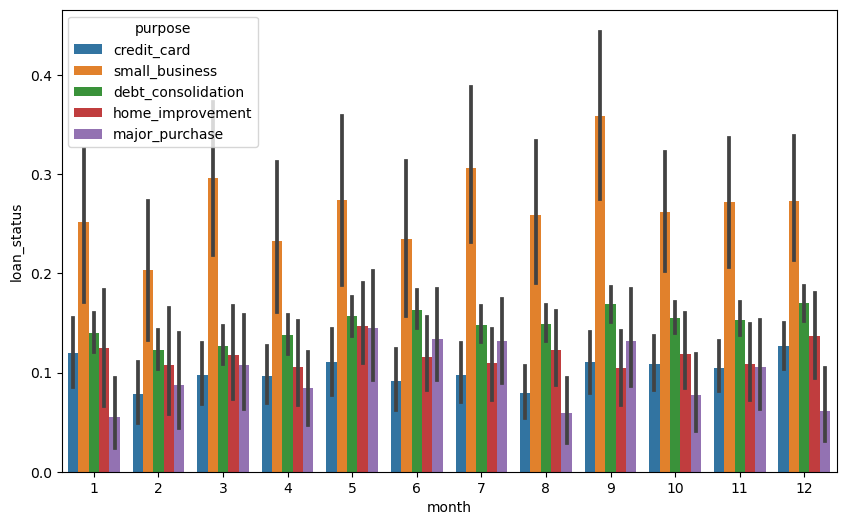

In [72]:
plot_seg('month')

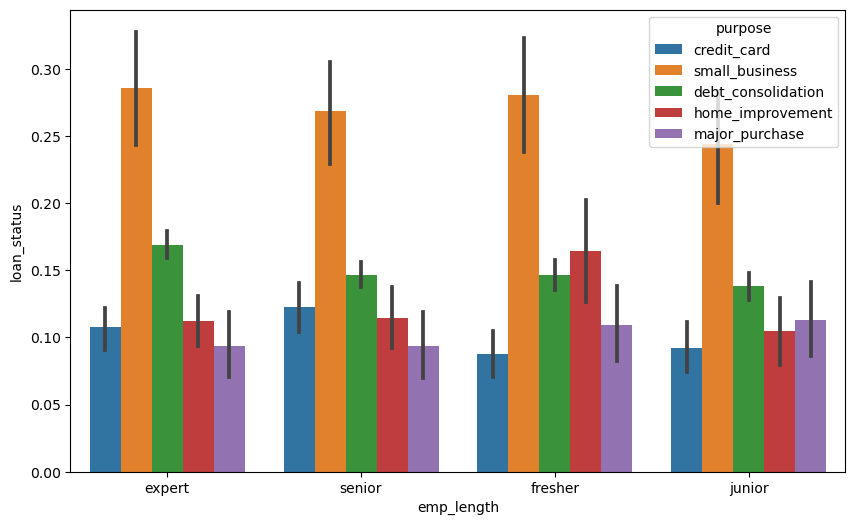

In [73]:
plot_seg('emp_length')

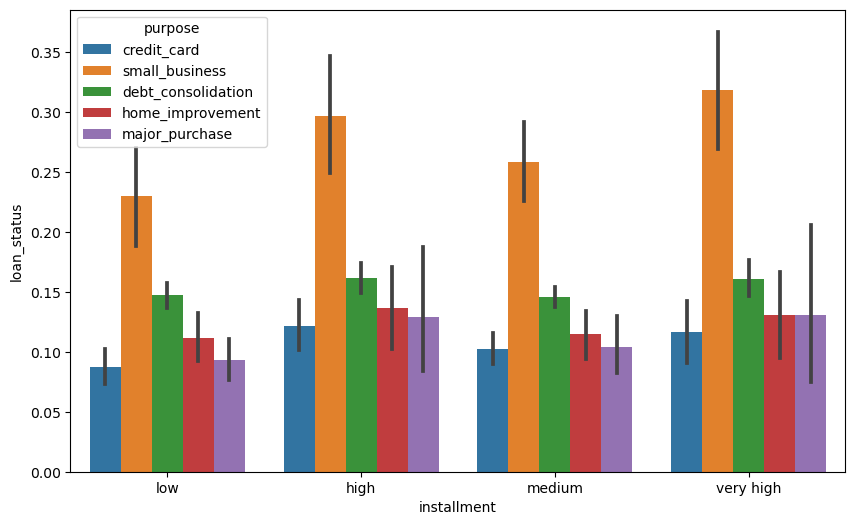

In [74]:
plot_seg('installment')

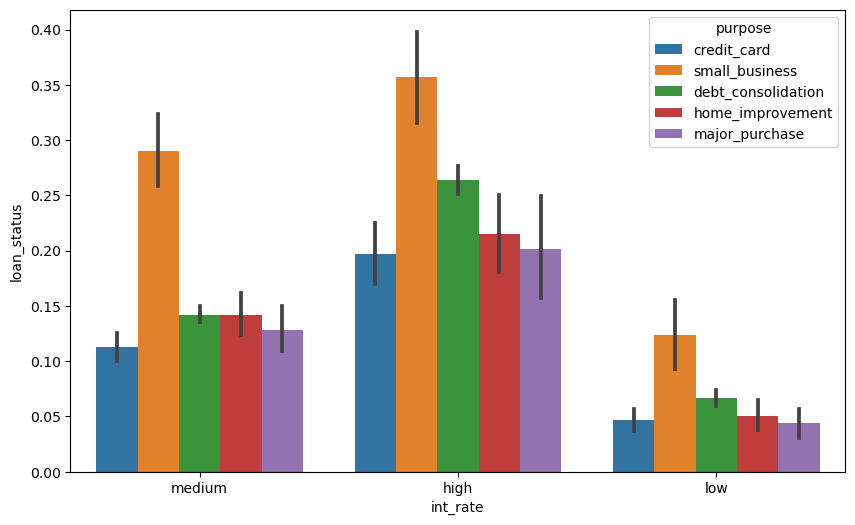

In [75]:
plot_seg('int_rate')

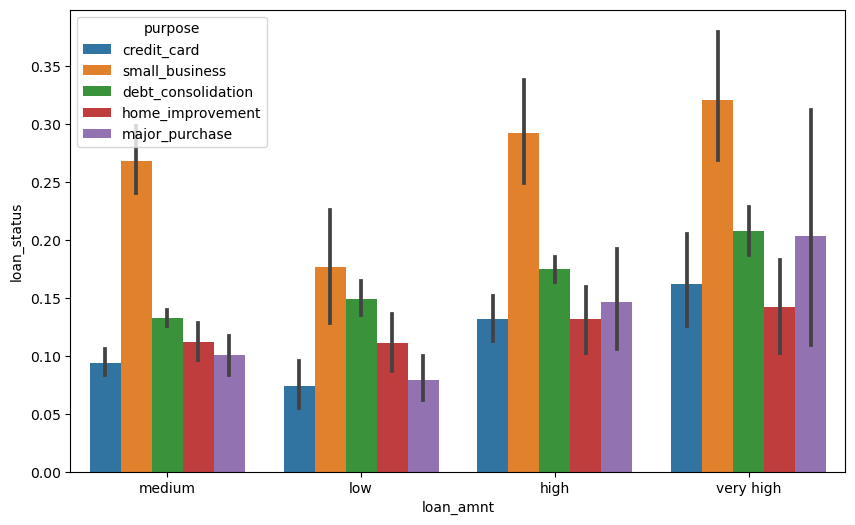

In [76]:
plot_seg('loan_amnt')

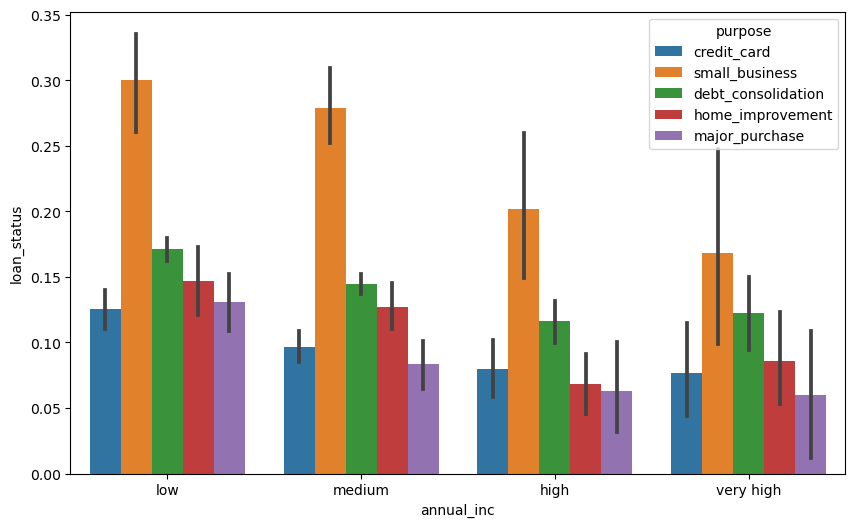

In [77]:
plot_seg('annual_inc')

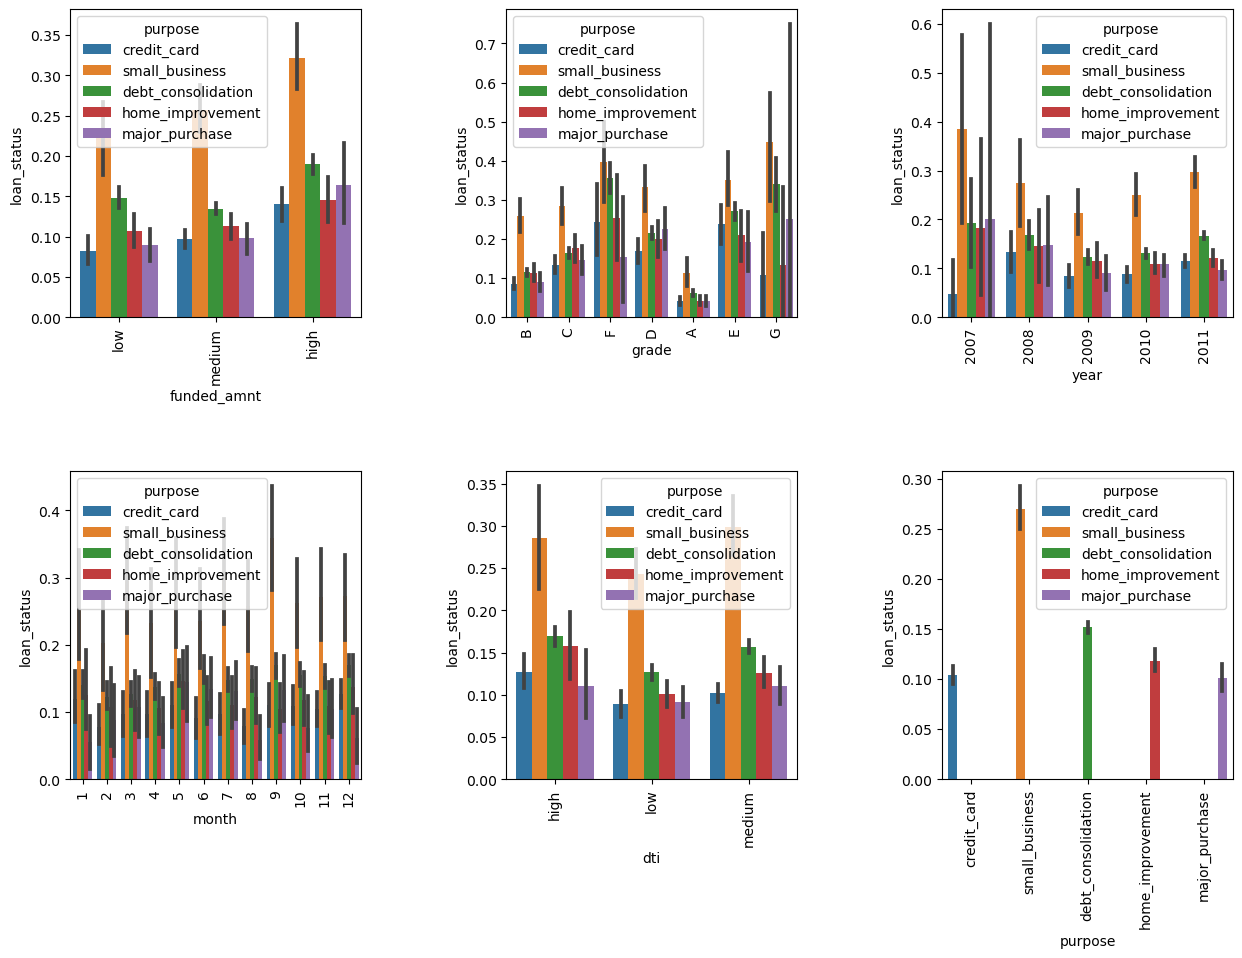

In [85]:
x=['funded_amnt','grade','year','month','dti','purpose']
plt.figure(figsize=(15,10))

for i in enumerate(x):
    plt.subplot(2, 3, i[0]+1)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.barplot(x = i[1], y = 'loan_status',hue='purpose', data = df1)
    plt.xticks(rotation=90)

### FROM AVOVE WE FIND THE SMALL BUSINESS HAVE THE HIGH DEFAULT RATE IN ALL CATEGORIES 
### SMALL BUSSINESS > DEBT CONSOLIDATIIN  
### HAS HIGHER DEFAULT RATE IN ALL TIME